In [49]:
#set up environment
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, interact_manual,interact
import ipywidgets as widget
from IPython.display import display
%matplotlib inline

# Hypsometric equation: relating the average temperature in a layer to the thickness of the layer between two pressure surfaces

Here we will define the hypsometric equation, which relates the change in height ("thickness") between two pressure levels to the mean temperature within the layer

$z_{2}-z_{1}=dz=\left ( \frac{R_{d}\bar{T}}{g_o}{} \right )ln\left ( \frac{p_{1}}{p_{2}} \right )$

In [50]:
def hypsometric(meanT,pbottom,ptop):
    '''This function uses the hypsometric equation to calculate dz given
    a mean temperature in a pressure layer bounded by  pressure levels (pbottom and ptop)
    
    input:
    ------
    meanT: mean temperature (K) in the layer
    pbottom: pressure of the bottom level (mb)
    ptop: pressure of the top pressure level (mb)
    
    returns:
    --------
    dz: the change in height between the pressure levels, or in otherwords,
        thickness of the layer in gpm
    '''
    Rd = 287.06 #dry gas constant, units=J kg−1 K−1
    g = 9.81 #gravity, units m/s**2
    dz = ((Rd*meanT)/g)*np.log((pbottom/ptop))
    return dz

Let's see how this works! For example, let us define our bottom pressure surface as 1000 mb and our upper pressure as 500 mb. So, we will be solving for the thickness of the 1000-500 mb layer, or in otherwords, the geopotential height difference between the two pressure levels.

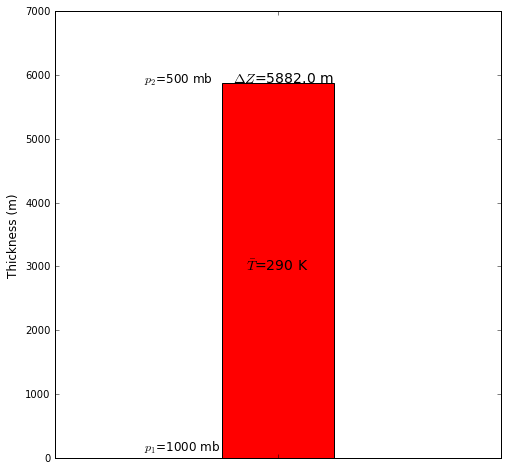

<function __main__.plot_dz>

In [51]:
def plot_dz(Tmean):
    pbottom = 1000.*100. #bottom pressure level,1000 mb to Pa
    ptop = 500.*100.  #top pressure level, 500 mb to Pa
    dz = hypsometric(Tmean,pbottom,ptop)
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    #plot a bar representing the thickness difference between two pressure surfaces
    plt.bar([1],height=dz,width=0.5,color='red',align='center')
    plt.ylim(0,7000)
    plt.xlim(0,2)
    plt.xticks([0,1,2],['','',''])
    plt.ylabel('Thickness (m)',fontsize='large')
    #plt.title('1000-500 mb Thickness = %0.1f m'%(dz))
    ax.annotate(r'$\Delta{Z}$=%0.1f m'%(dz),xy=(0.8,dz),textcoords='data',fontsize=14)
    ax.annotate(r'$\bar{T}$=%i K'%(Tmean),xy=(0.855,dz/2.),textcoords='data',fontsize=14)
    ax.annotate('$p_{2}$=500 mb',xy=(0.4,dz),textcoords='data',fontsize=12)
    ax.annotate('$p_{1}$=1000 mb',xy=(0.4,100),textcoords='data',fontsize=12)
    
    plt.show()
    
#create the plot with input from the slider    
interact(plot_dz,Tmean=widget.FloatSlider(value=290.,min=250.,max=300.,step=1.,description='Mean Temperature (K)'))

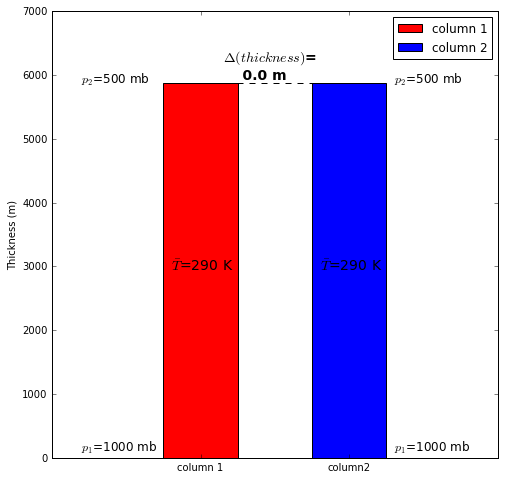

<function __main__.plot_dz_2col>

In [52]:
def plot_dz_2col(Tmean1,Tmean2):
    p1 = 1000.*100. #1000 mb to Pa
    p2 = 500.*100.  #500 mb to Pa
    dz1 = hypsometric(Tmean1,p1,p2)
    dz2 = hypsometric(Tmean2,p1,p2)
    delta_dz = np.absolute(dz1-dz2)
    #create our bar plot representing thickness between p1 and p2
    fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    bar1 = ax1.bar([1],height=dz1,width=0.5,color='red',align='center',label='column 1')
    bar2 = ax1.bar([2],height=dz2,width=0.5,color='blue',align='center',label='column 2')
    ax1.plot([1,2],[dz1,dz2],color='k',linestyle='--')
    ax1.set_ylim(0,7000)
    ax1.set_xlim(0,3)
    ax1.set_xticks(np.arange(0,4,1))
    ax1.set_xticklabels(['','column 1','column2',''])#np.arange(0,4,1),['','column 1','column2',''])
    ax1.set_ylabel('Thickness (m)')
    ax1.annotate('$\Delta(thickness)$= \n    %.1f m'%delta_dz,xy=(1.15,(dz1+dz2)/2.+80),textcoords='data',fontsize=14,weight='bold')
    ax1.annotate('$p_{2}$=500 mb',xy=(0.2,dz1),textcoords='data',fontsize=12)
    ax1.annotate('$p_{1}$=1000 mb',xy=(0.2,100),textcoords='data',fontsize=12)
    ax1.annotate('$p_{2}$=500 mb',xy=(2.3,dz2),textcoords='data',fontsize=12)
    ax1.annotate('$p_{1}$=1000 mb',xy=(2.3,100),textcoords='data',fontsize=12)
    ax1.annotate(r'$\bar{T}$=%i K'%(Tmean1),xy=(0.8,dz1/2.),textcoords='data',fontsize=14)
    ax1.annotate(r'$\bar{T}$=%i K'%(Tmean2),xy=(1.8,dz2/2.),textcoords='data',fontsize=14)
    plt.legend()
    
   
    plt.show()
    
interact(plot_dz_2col,Tmean1=widget.FloatSlider(value=290.,min=250.,max=310.,step=1.,description='Column 1 Mean Temperature (K)'),
         Tmean2=widget.FloatSlider(value=290.,min=240.,max=300.,step=1.,description='Column 2 Mean Temperature (K)'))